dataset link - https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset

In [2]:
import numpy as np
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:

train_healthy = "G:\DEEP LEARNING\Train\Train\Healthy"
train_powdery = "G:\DEEP LEARNING\Train\Train\Powdery"
train_rust ="G:\DEEP LEARNING\Train\Train\Rust"

test_healthy ="G:\DEEP LEARNING\Test\Test\Healthy"
test_powdery ="G:\DEEP LEARNING\Test\Test\Powdery"
test_rust ="G:\DEEP LEARNING\Test\Test\Rust"

valid_healthy = "G:\DEEP LEARNING\Validation\Validation\Healthy"
valid_powdery ="G:\DEEP LEARNING\Validation\Validation\Powdery"
valid_rust ="G:\DEEP LEARNING\Validation\Validation\Rust"

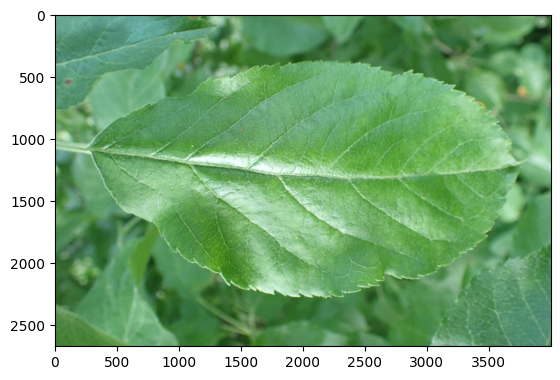

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'Train/Train/Healthy/8ce77048e12f3dd4.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()


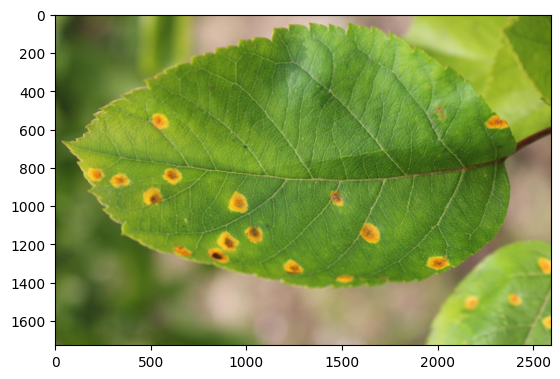

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'Train\Train\Rust\80f09587dfc7988e.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()


In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory('G:\DEEP LEARNING\Train\Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('G:\DEEP LEARNING\Validation\Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/20
42/42 [==============================] - 117s 3s/step - loss: 2.5675 - accuracy: 0.4448 - val_loss: 0.7826 - val_accuracy: 0.6667
Epoch 2/20
42/42 [==============================] - 114s 3s/step - loss: 0.6964 - accuracy: 0.6853 - val_loss: 0.5933 - val_accuracy: 0.7667
Epoch 3/20
42/42 [==============================] - 117s 3s/step - loss: 0.4240 - accuracy: 0.8253 - val_loss: 0.5285 - val_accuracy: 0.8000
Epoch 4/20
42/42 [==============================] - 145s 3s/step - loss: 0.3370 - accuracy: 0.8707 - val_loss: 0.6388 - val_accuracy: 0.7167
Epoch 5/20
42/42 [==============================] - 139s 3s/step - loss: 0.3530 - accuracy: 0.8767 - val_loss: 0.5730 - val_accuracy: 0.7500
Epoch 6/20
42/42 [==============================] - 143s 3s/step - loss: 0.2482 - accuracy: 0.9206 - val_loss: 0.4910 - val_accuracy: 0.8833
Epoch 7/20
42/42 [==============================] - 155s 4s/step - loss: 0.2218 - accuracy: 0.9259 - val_loss: 0.3982 - val_accuracy: 0.8667
Epoch 8/20
42

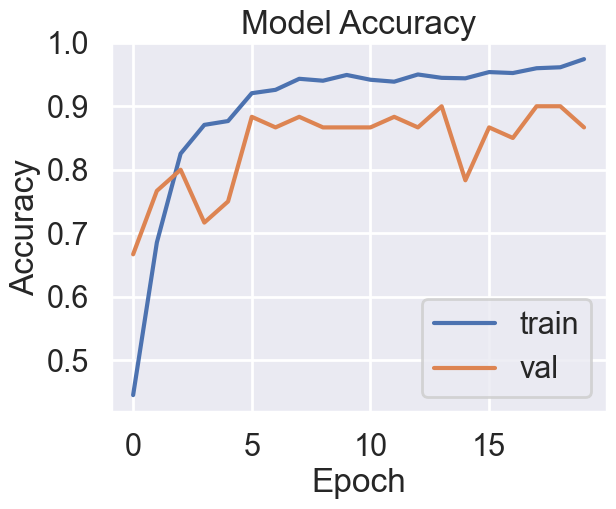

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('rust.png')
x

array([[[[0.10196079, 0.29803923, 0.11764706],
         [0.11764706, 0.2901961 , 0.10196079],
         [0.        , 0.30588236, 0.07058824],
         ...,
         [0.9529412 , 1.        , 1.        ],
         [0.9529412 , 1.        , 1.        ],
         [0.9529412 , 1.        , 1.        ]],

        [[0.14117648, 0.31764707, 0.12941177],
         [0.19607843, 0.3764706 , 0.18431373],
         [0.08235294, 0.34901962, 0.11764706],
         ...,
         [0.9529412 , 1.        , 1.        ],
         [0.9529412 , 1.        , 1.        ],
         [0.9529412 , 1.        , 1.        ]],

        [[0.25882354, 0.43137255, 0.21960784],
         [0.11372549, 0.27450982, 0.07450981],
         [0.12941177, 0.29411766, 0.09411765],
         ...,
         [0.9647059 , 1.        , 1.        ],
         [0.9647059 , 1.        , 1.        ],
         [0.9529412 , 1.        , 1.        ]],

        ...,

        [[0.08235294, 0.06666667, 0.12156863],
         [0.18431373, 0.14901961, 0.1882353 ]

In [13]:
model.save('leaf_desease.h5')

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('leaf_desease.h5')


In [15]:
predictions = loaded_model.predict(x)
predictions

1/1 [==============================] - 0s 125ms/step


array([[6.7318467e-10, 2.2048256e-17, 1.0000000e+00]], dtype=float32)

In [16]:
labels = {0: 'Healthy', 1: 'Powdery', 2: 'Rust'}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [17]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
